In [147]:
from spcup2023.dataset import spcup23_ds
import numpy as np
import matplotlib.pyplot as plt



In [133]:
dataset = spcup23_ds('../dataset')

In [134]:
X, Y = [], []

# Read labels and FCNs from dataset
for i in range(len(dataset)):
    Y.append(dataset[i][1])
    X.append(dataset[i][2]) # we care only about FCN
    
X = np.stack(X) #Make one big array, normalized
Y = np.array(Y)

print(X.shape)
print(Y.shape)

(471, 5460)
(471,)


In [145]:
# Normalize the data
X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

from sklearn.decomposition import PCA
# Perform PCA
pca = PCA(n_components=2)
pca.fit(X_norm)
pcs = pca.transform(X_norm)

from sklearn.cluster import KMeans
# Cluster the data using k-means
kmeans = KMeans(n_clusters=2, random_state=417)
clusters = kmeans.fit_predict(X_norm)


print(pcs.shape)
print(clusters.shape)

SH=[]
BP=[]
for i in range (471):
    if (Y[i]==0): #check SH
        SH.append(pcs[i])
    else: #check BP
        BP.append(pcs[i])

SH=np.stack(SH)
BP=np.stack(BP)

(471, 2)
(471,)


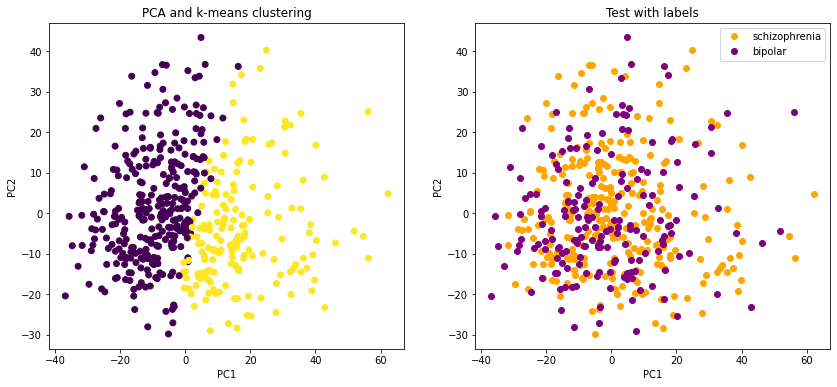

In [146]:


# Visualize the clusters
fig,axes=plt.subplots(1,2,figsize=(14,6))
axes[0].scatter(pcs[:, 0], pcs[:, 1], c=clusters)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('PCA and k-means clustering')
axes[1].plot(SH[:,0],SH[:,1],c='orange',marker='o',linestyle='None',label='schizophrenia')
axes[1].plot(BP[:,0],BP[:,1],c='purple',marker='o',linestyle='None',label='bipolar')
#axes[2].plot(pcs[:, 0], pcs[:, 1],'ko')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Test with labels')
axes[1].legend()

plt.show()